In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Sooraj\Downloads\crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
X = df.iloc[:, 1:]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering

In [8]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [9]:
Clusters=pd.DataFrame(agg_labels,columns=['Clusters'])

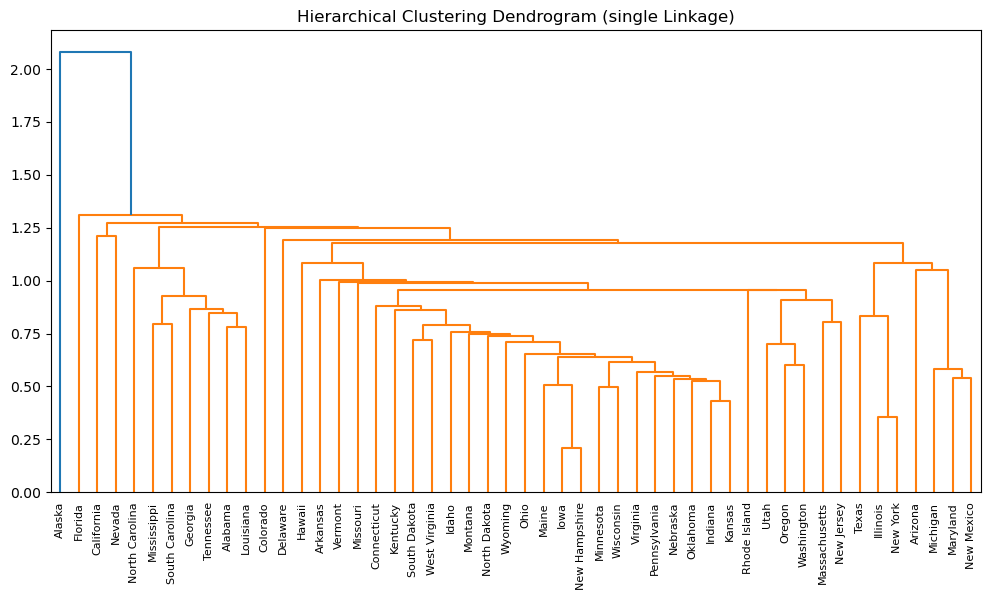

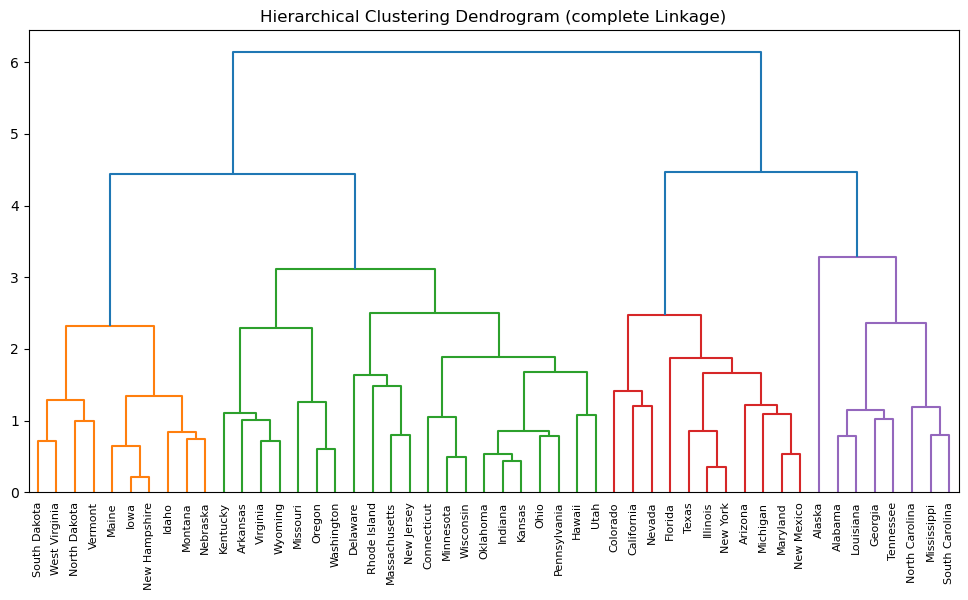

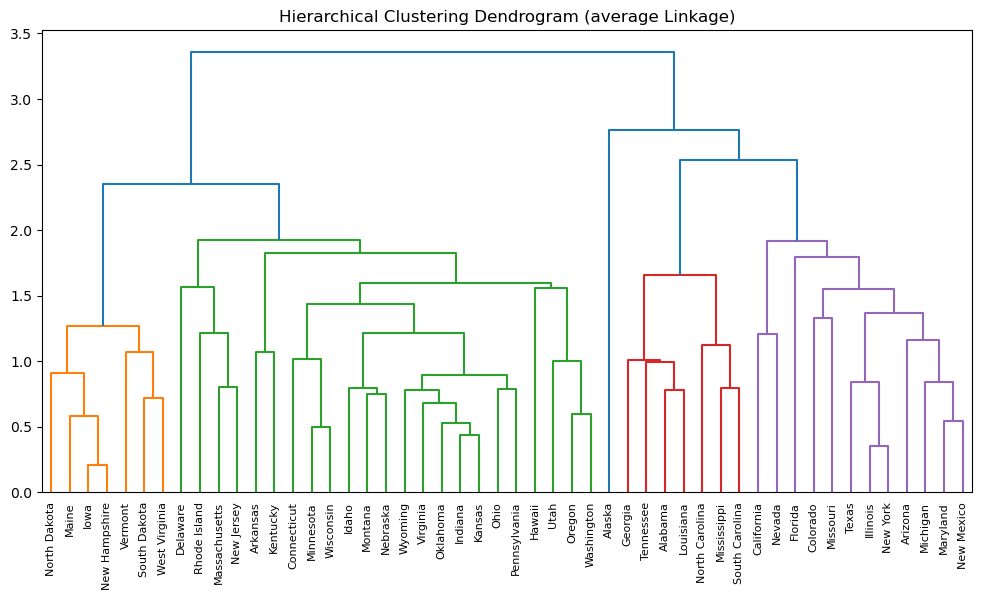

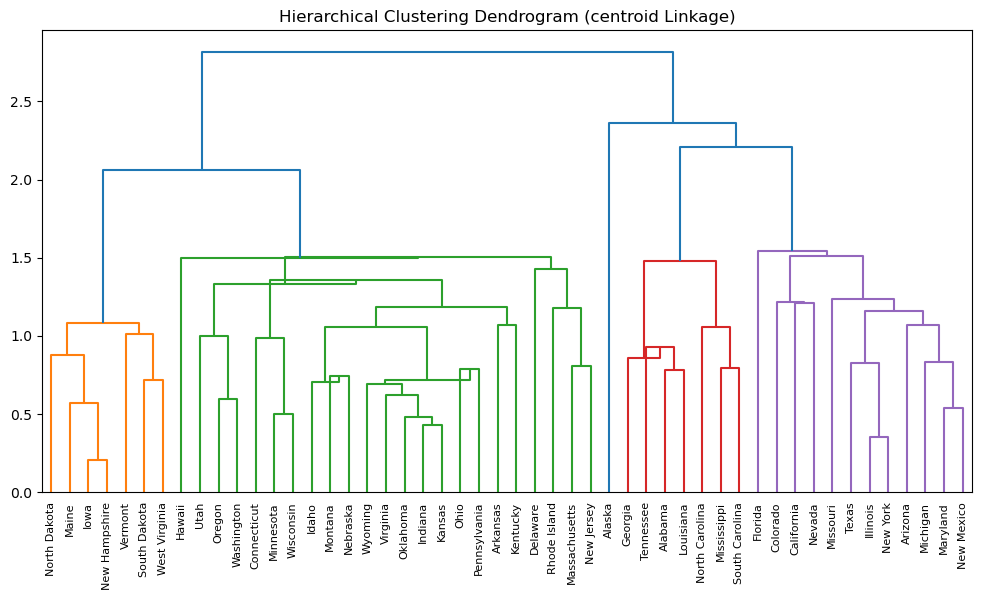

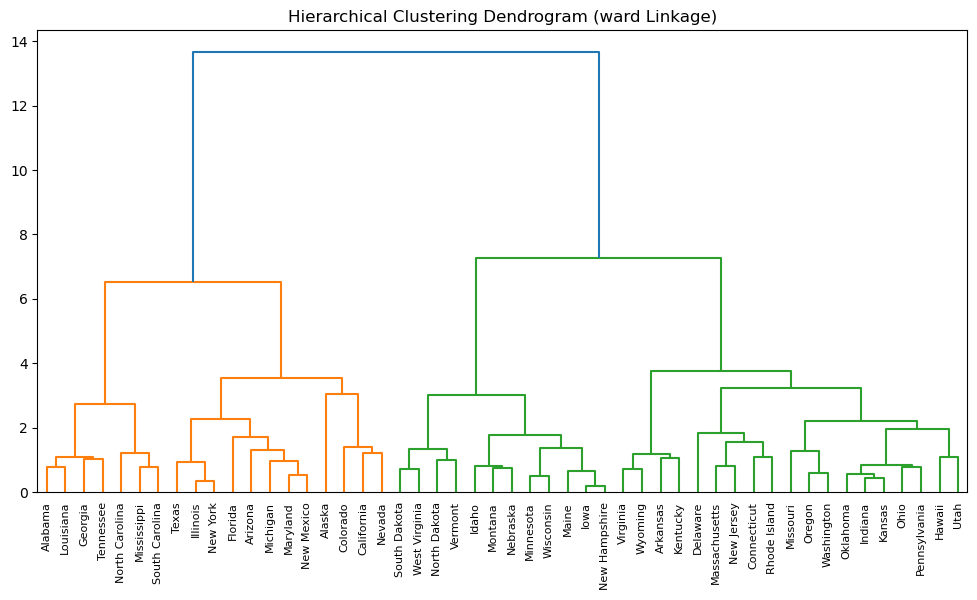

In [10]:
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']
data_labels = df['Unnamed: 0'].tolist()

for method in linkage_methods:
    linkage_matrix = sch.linkage(X_scaled, method=method, metric='euclidean')
    plt.figure(figsize=(12, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} Linkage)')
    dendrogram(linkage_matrix, labels=data_labels)
    plt.show()


# K-means Clustering

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

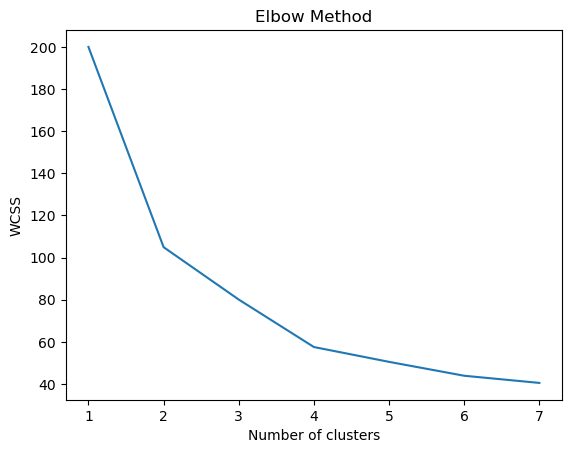

In [11]:
#Elbow chart
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# K-Means Clustering
kmeans_cluster = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_cluster.fit_predict(X_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
df['KMeans'] = kmeans_labels

In [14]:
kmeans_cluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [15]:
kmeans_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [16]:
# calculate the mean for specific numerical columns, for example 'Murder', 'Assault', 'UrbanPop', and 'Rape':
mean_stats = df.groupby('KMeans')[['Murder', 'Assault', 'UrbanPop', 'Rape']].mean().reset_index()
mean_stats

,KMeans,Murder,Assault,UrbanPop,Rape
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


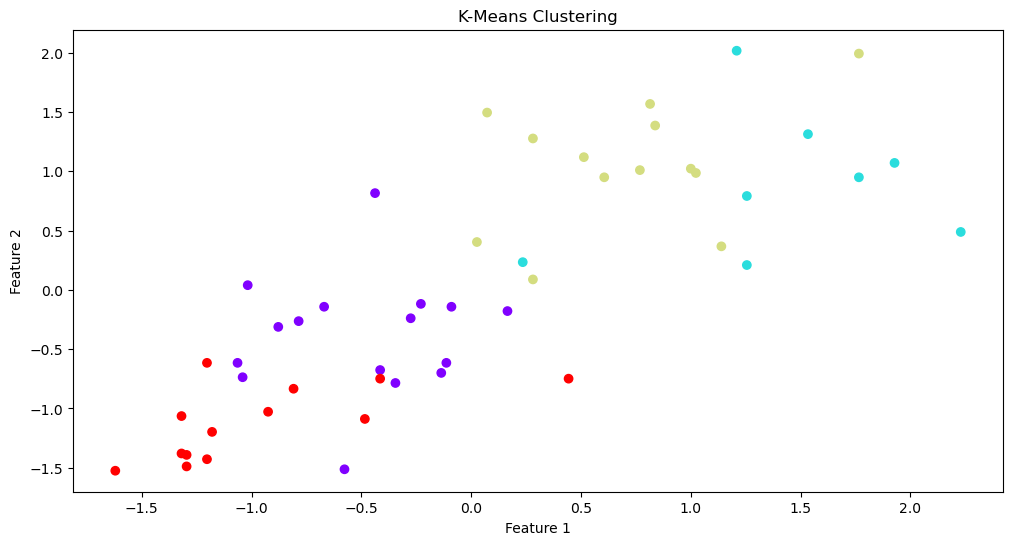

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN

In [18]:
dbscan_cluster = DBSCAN(eps=1.2, min_samples=5)
dbscan_cluster.fit(X_scaled)
dbscan_labels = dbscan_cluster.fit_predict(X_scaled)

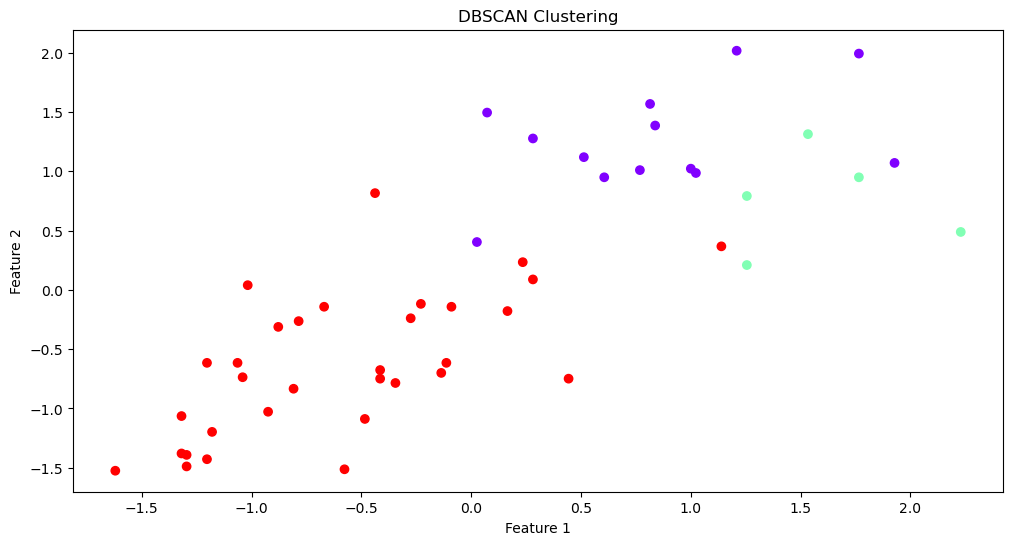

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
print("DBSCAN Clustering Labels:")
print(dbscan_labels)

DBSCAN Clustering Labels:
[ 0 -1 -1  1 -1 -1  1  1 -1  0  1  1 -1  1  1  1  1  0  1 -1  1 -1  1 -1
  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]


# Inference 

### Number of clusters formed by Hierarchical Clustering:4
### Number of clusters formed by K-Means Clustering:4
### Number of clusters formed by DBSCAN: 3
## The Clusters indicate the similarity in the crime data for different regions